<a href="https://colab.research.google.com/github/zedline4/100-Days-Of-ML-Code/blob/master/Fatal_Force_(start).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

Since Jan. 1, 2015, [The Washington Post](https://www.washingtonpost.com/) has been compiling a database of every fatal shooting in the US by a police officer in the line of duty.

<center><img src=https://i.imgur.com/sX3K62b.png></center>

While there are many challenges regarding data collection and reporting, The Washington Post has been tracking more than a dozen details about each killing. This includes the race, age and gender of the deceased, whether the person was armed, and whether the victim was experiencing a mental-health crisis. The Washington Post has gathered this supplemental information from law enforcement websites, local new reports, social media, and by monitoring independent databases such as "Killed by police" and "Fatal Encounters". The Post has also conducted additional reporting in many cases.

There are 4 additional datasets: US census data on poverty rate, high school graduation rate, median household income, and racial demographics. [Source of census data](https://factfinder.census.gov/faces/nav/jsf/pages/community_facts.xhtml).

### Upgrade Plotly

Run the cell below if you are working with Google Colab

In [1]:
%pip install --upgrade plotly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.6/15.6 MB 47.6 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.15.0
    Uninstalling plotly-5.15.0:
      Successfully uninstalled plotly-5.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.


## Import Statements

In [2]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# This might be helpful:
from collections import Counter

## Notebook Presentation

In [3]:
pd.options.display.float_format = '{:,.2f}'.format

## Load the Data

In [4]:
df_hh_income = pd.read_csv('Median_Household_Income_2015.csv', encoding="windows-1252")
df_pct_poverty = pd.read_csv('Pct_People_Below_Poverty_Level.csv', encoding="windows-1252")
df_pct_completed_hs = pd.read_csv('Pct_Over_25_Completed_High_School.csv', encoding="windows-1252")
df_share_race_city = pd.read_csv('Share_of_Race_By_City.csv', encoding="windows-1252")
df_fatalities = pd.read_csv('Deaths_by_Police_US.csv', encoding="windows-1252")

# Preliminary Data Exploration

* What is the shape of the DataFrames?
* How many rows and columns do they have?
* What are the column names?
* Are there any NaN values or duplicates?

In [5]:
print(df_hh_income.shape)
print(df_pct_poverty.shape)
print(df_pct_completed_hs.shape)
print(df_share_race_city.shape)
print(df_fatalities.shape)

(29322, 3)
(29329, 3)
(29329, 3)
(29268, 7)
(2535, 14)


In [6]:
print(df_hh_income.columns)
print(df_pct_poverty.columns)
print(df_pct_completed_hs.columns)
print(df_share_race_city.columns)
print(df_fatalities.columns)

Index(['Geographic Area', 'City', 'Median Income'], dtype='object')
Index(['Geographic Area', 'City', 'poverty_rate'], dtype='object')
Index(['Geographic Area', 'City', 'percent_completed_hs'], dtype='object')
Index(['Geographic area', 'City', 'share_white', 'share_black',
       'share_native_american', 'share_asian', 'share_hispanic'],
      dtype='object')
Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera'],
      dtype='object')


In [7]:
print(df_hh_income.isna().any())
print(df_pct_poverty.isna().any())
print(df_pct_completed_hs.isna().any())
print(df_share_race_city.isna().any())
print(df_fatalities.isna().any())

Geographic Area    False
City               False
Median Income       True
dtype: bool
Geographic Area    False
City               False
poverty_rate       False
dtype: bool
Geographic Area         False
City                    False
percent_completed_hs    False
dtype: bool
Geographic area          False
City                     False
share_white              False
share_black              False
share_native_american    False
share_asian              False
share_hispanic           False
dtype: bool
id                         False
name                       False
date                       False
manner_of_death            False
armed                       True
age                         True
gender                     False
race                        True
city                       False
state                      False
signs_of_mental_illness    False
threat_level               False
flee                        True
body_camera                False
dtype: bool


In [8]:
print(df_hh_income.duplicated().any())
print(df_pct_poverty.duplicated().any())
print(df_pct_completed_hs.duplicated().any())
print(df_share_race_city.duplicated().any())
print(df_fatalities.duplicated().any())

False
False
False
False
False


## Data Cleaning - Check for Missing Values and Duplicates

Consider how to deal with the NaN values. Perhaps substituting 0 is appropriate.

In [9]:
print(df_hh_income.fillna(0, inplace=True))
print(df_pct_poverty.fillna(0, inplace=True))
print(df_pct_completed_hs.fillna(0, inplace=True))
print(df_share_race_city.fillna(0, inplace=True))
print(df_fatalities.fillna(0, inplace=True))

None
None
None
None
None


In [10]:
print(df_hh_income.isna().any())
print(df_pct_poverty.isna().any())
print(df_pct_completed_hs.isna().any())
print(df_share_race_city.isna().any())
print(df_fatalities.isna().any())

Geographic Area    False
City               False
Median Income      False
dtype: bool
Geographic Area    False
City               False
poverty_rate       False
dtype: bool
Geographic Area         False
City                    False
percent_completed_hs    False
dtype: bool
Geographic area          False
City                     False
share_white              False
share_black              False
share_native_american    False
share_asian              False
share_hispanic           False
dtype: bool
id                         False
name                       False
date                       False
manner_of_death            False
armed                      False
age                        False
gender                     False
race                       False
city                       False
state                      False
signs_of_mental_illness    False
threat_level               False
flee                       False
body_camera                False
dtype: bool


# Chart the Poverty Rate in each US State

Create a bar chart that ranks the poverty rate from highest to lowest by US state. Which state has the highest poverty rate? Which state has the lowest poverty rate?  Bar Plot

In [11]:
df_pct_poverty.tail()

,Geographic Area,City,poverty_rate
29324,WY,Woods Landing-Jelm CDP,18.6
29325,WY,Worland city,15.3
29326,WY,Wright town,5.9
29327,WY,Yoder town,5.4
29328,WY,Y-O Ranch CDP,0


In [12]:
df_pct_poverty['poverty_rate'] = pd.to_numeric(df_pct_poverty['poverty_rate'], errors='coerce')

states_poverty_rates = df_pct_poverty.groupby('Geographic Area')['poverty_rate'].mean().sort_values(ascending=False)


<Axes: title={'center': 'Poverty rate by state in the US'}, xlabel='Geographic Area'>

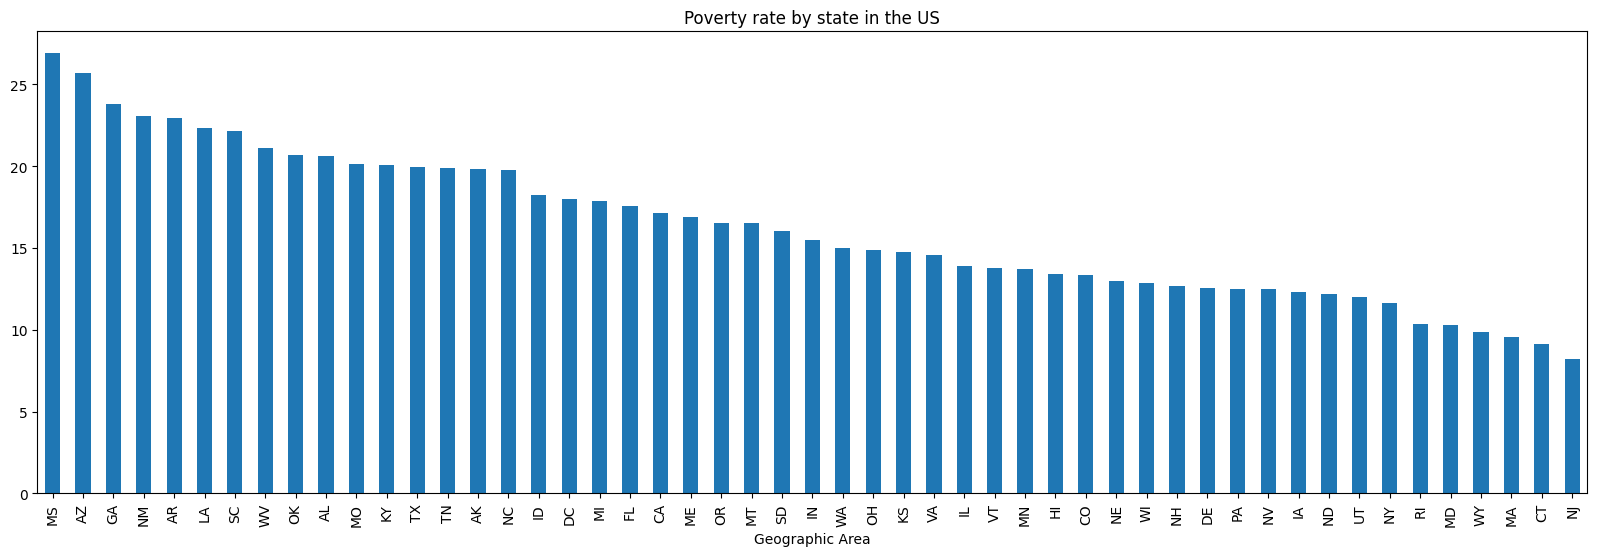

In [13]:
plt.figure(figsize=(20,6))
states_poverty_rates.plot(kind='bar', title='Poverty rate by state in the US')


# Chart the High School Graduation Rate by US State

Show the High School Graduation Rate in ascending order of US States. Which state has the lowest high school graduation rate? Which state has the highest?

In [14]:
df_pct_completed_hs.head()

,Geographic Area,City,percent_completed_hs
0,AL,Abanda CDP,21.2
1,AL,Abbeville city,69.1
2,AL,Adamsville city,78.9
3,AL,Addison town,81.4
4,AL,Akron town,68.6


In [15]:
df_pct_completed_hs['percent_completed_hs']= pd.to_numeric(df_pct_completed_hs['percent_completed_hs'], errors='coerce')
graduation_per_state=df_pct_completed_hs.groupby('Geographic Area')['percent_completed_hs'].mean().sort_values(ascending=False)

<Axes: title={'center': 'Rate of completed high schooling per state in the US'}, xlabel='Geographic Area'>

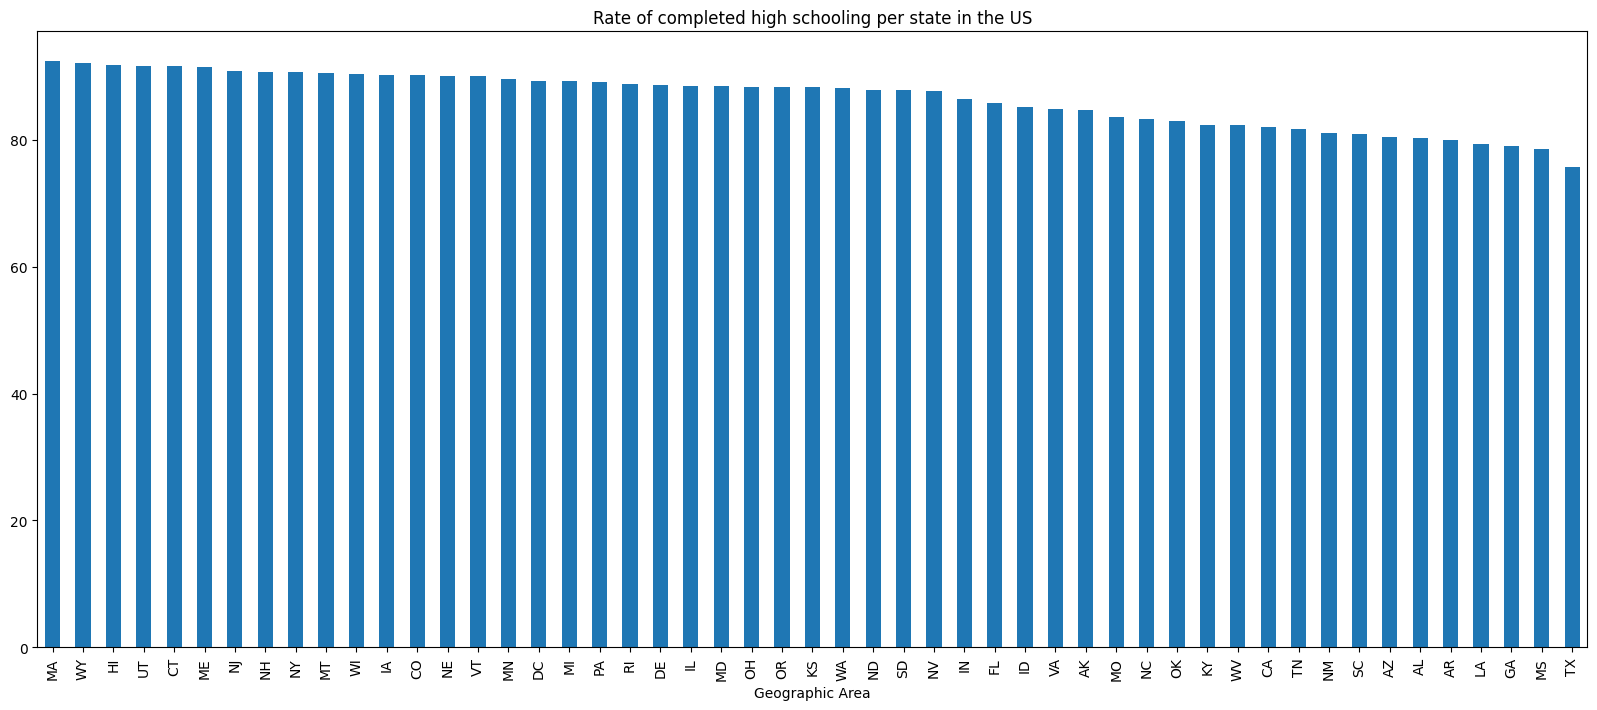

In [16]:
plt.figure(figsize=(20,8))
graduation_per_state.plot(kind='bar', title='Rate of completed high schooling per state in the US')

# Visualise the Relationship between Poverty Rates and High School Graduation Rates

#### Create a line chart with two y-axes to show if the rations of poverty and high school graduation move together.  

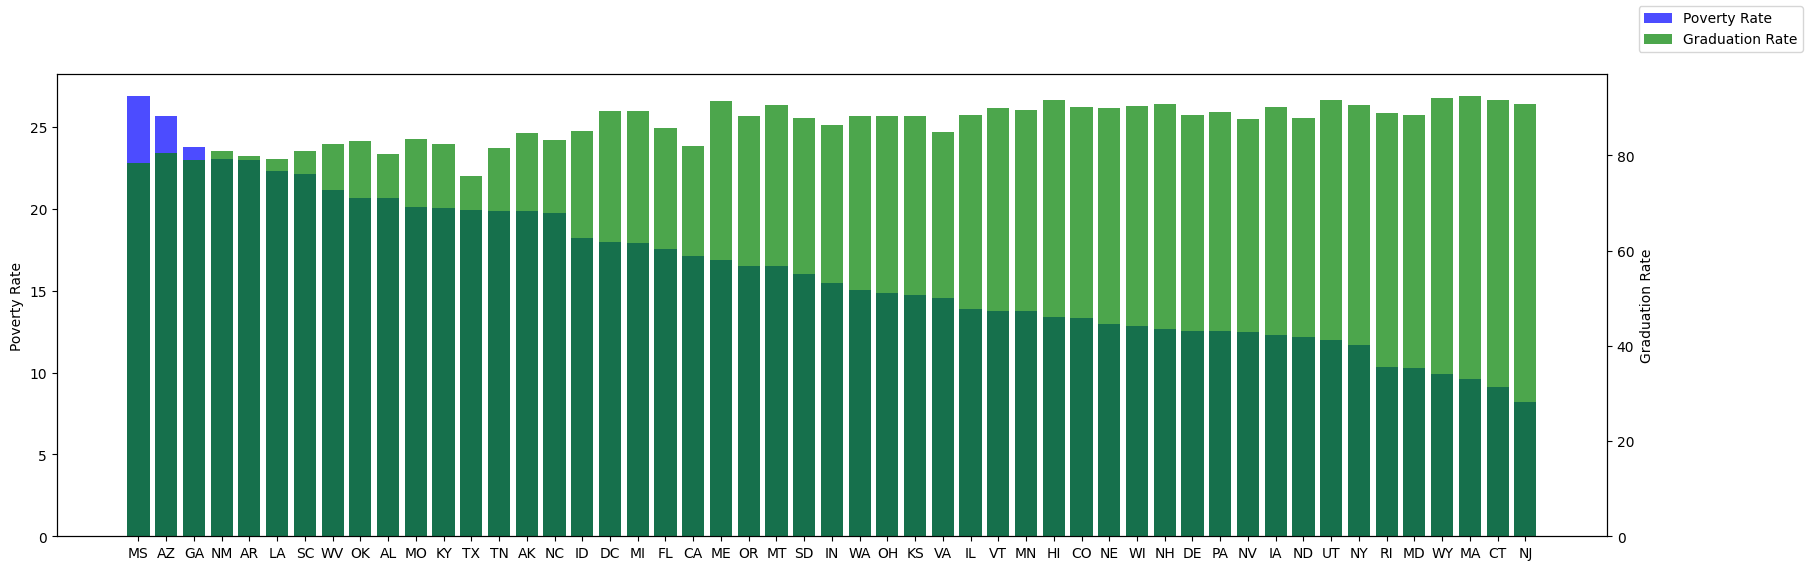

In [17]:

fig, ax1 = plt.subplots(figsize=(20, 6))
ax2 = ax1.twinx()

ax1.bar(states_poverty_rates.index, states_poverty_rates, color='blue', alpha=0.7, label='Poverty Rate')  # set color for the first bar plot
ax2.bar(graduation_per_state.index, graduation_per_state, color='green', alpha=0.7, label='Graduation Rate')  # set color for the second bar plot

ax1.set_ylabel('Poverty Rate')  # set y-axis label for the first plot
ax2.set_ylabel('Graduation Rate')  # set y-axis label for the second plot

fig.legend(loc="upper right")  # Add legend

plt.show()


#### Now use a Seaborn .jointplot() with a Kernel Density Estimate (KDE) and/or scatter plot to visualise the same relationship

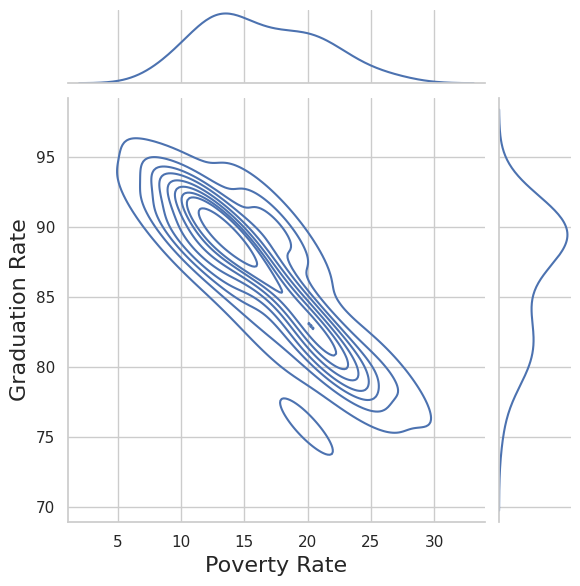

In [18]:
sns.set(style="whitegrid")

g = sns.jointplot(x=states_poverty_rates, y=graduation_per_state, kind="kde")

g.set_axis_labels("Poverty Rate", "Graduation Rate", fontsize=16)

plt.show()

#### Seaborn's `.lmplot()` or `.regplot()` to show a linear regression between the poverty ratio and the high school graduation ratio.

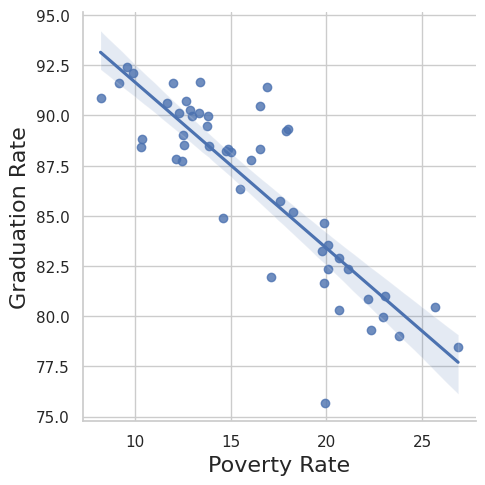

In [19]:
data = pd.DataFrame({
    'Poverty Rate': states_poverty_rates,
    'Graduation Rate': graduation_per_state
})

# Set the style
sns.set(style="whitegrid")

# Create the lmplot
g = sns.lmplot(x="Poverty Rate", y="Graduation Rate", data=data)

# Set labels for the x and y axes
g.set_axis_labels("Poverty Rate", "Graduation Rate", fontsize=16)

# Show the plot
plt.show()

# Create a Bar Chart with Subsections Showing the Racial Makeup of Each US State

Visualise the share of the white, black, hispanic, asian and native american population in each US State using a bar chart with sub sections.

In [20]:
df_share_race_city.head()

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AL,Abanda CDP,67.2,30.2,0,0,1.6
1,AL,Abbeville city,54.4,41.4,0.1,1,3.1
2,AL,Adamsville city,52.3,44.9,0.5,0.3,2.3
3,AL,Addison town,99.1,0.1,0,0.1,0.4
4,AL,Akron town,13.2,86.5,0,0,0.3


In [21]:
df_share_race_city['share_white'] = pd.to_numeric(df_share_race_city['share_white'], errors='coerce')
df_share_race_city['share_black'] = pd.to_numeric(df_share_race_city['share_black'], errors='coerce')
df_share_race_city['share_native_american'] = pd.to_numeric(df_share_race_city['share_native_american'], errors='coerce')
df_share_race_city['share_asian'] = pd.to_numeric(df_share_race_city['share_asian'], errors='coerce')
df_share_race_city['share_hispanic'] = pd.to_numeric(df_share_race_city['share_hispanic'], errors='coerce')

In [22]:
share_white_per_state=df_share_race_city.groupby('Geographic area')['share_white'].mean()
share_black_per_state=df_share_race_city.groupby('Geographic area')['share_black'].mean()
share_native_per_state=df_share_race_city.groupby('Geographic area')['share_native_american'].mean()
share_asian_per_state=df_share_race_city.groupby('Geographic area')['share_asian'].mean()
share_hispanic_per_state=df_share_race_city.groupby('Geographic area')['share_hispanic'].mean()

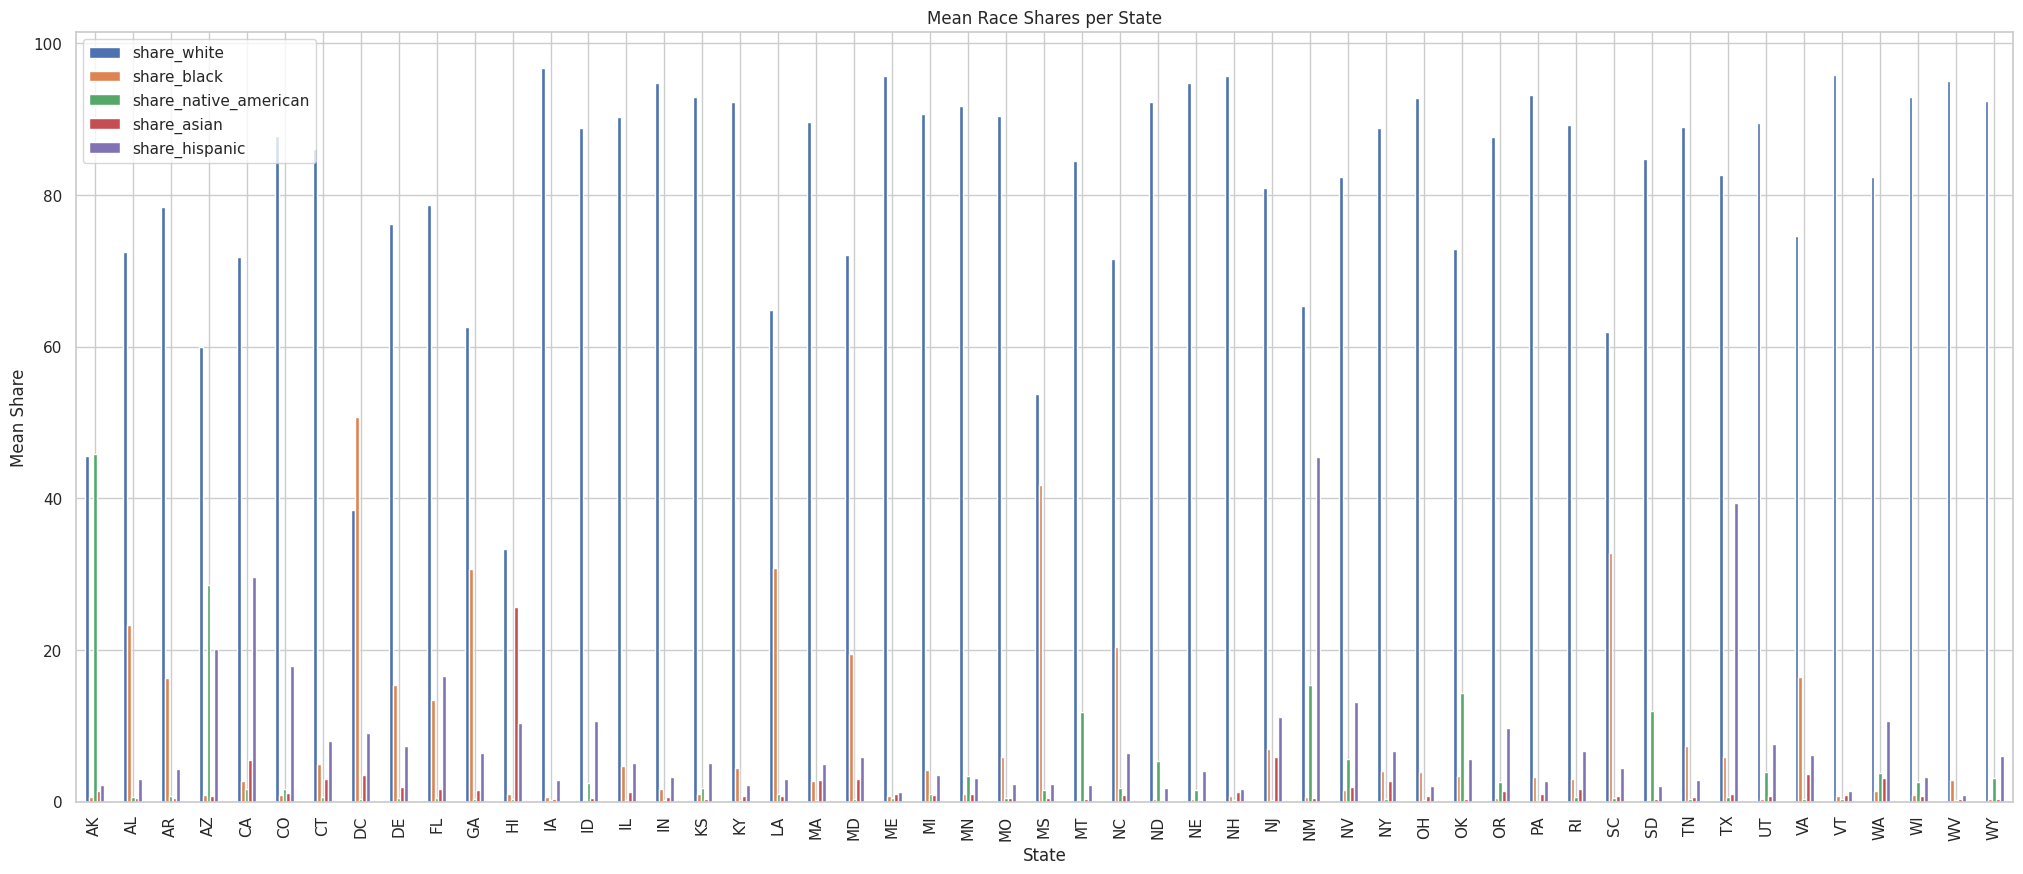

In [23]:
combined_data = pd.DataFrame({
    'share_white': share_white_per_state,
    'share_black': share_black_per_state,
    'share_native_american': share_native_per_state,
    'share_asian': share_asian_per_state,
    'share_hispanic': share_hispanic_per_state
})


combined_data.plot(kind='bar', figsize=(25,10))
plt.title('Mean Race Shares per State')
plt.xlabel('State')
plt.ylabel('Mean Share')
plt.show()

# Create Donut Chart by of People Killed by Race

Hint: Use `.value_counts()`

In [24]:
df_fatalities.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.00,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.00,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.00,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.00,M,H,Evans,CO,False,attack,Not fleeing,False


In [25]:
killed_by_race=df_fatalities['race'].value_counts(ascending=False)
killed_by_race

W    1201
B     618
H     423
0     195
A      39
N      31
O      28
Name: race, dtype: int64

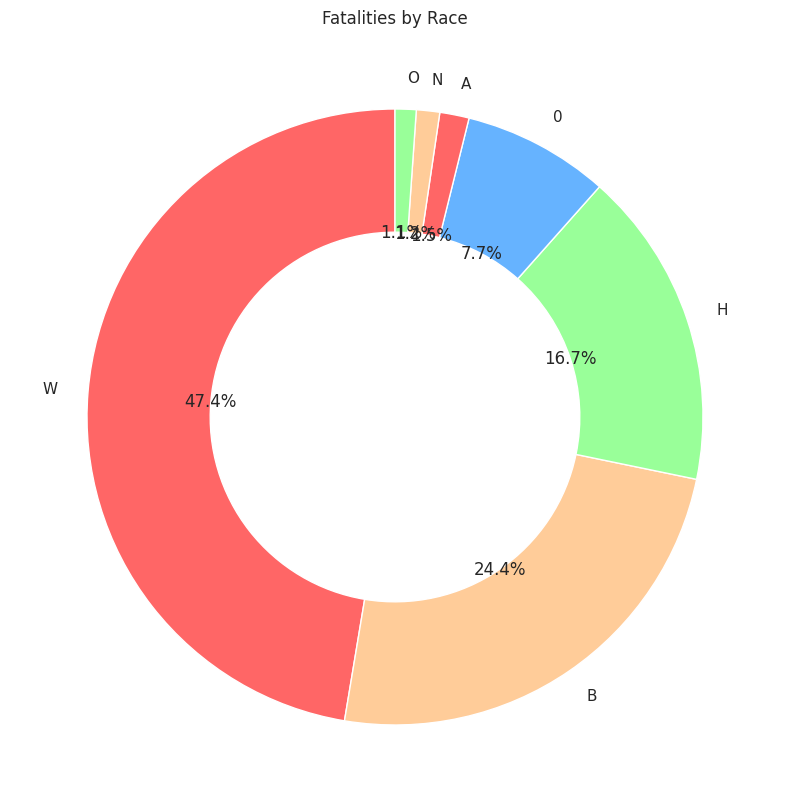

In [26]:
plt.figure(figsize=(10,10))
plt.pie(killed_by_race, labels=killed_by_race.index, autopct='%1.1f%%', startangle=90, colors=['#ff6666', '#ffcc99', '#99ff99', '#66b3ff'], wedgeprops=dict(width=0.4))
plt.title('Fatalities by Race')
plt.show()


# Create a Chart Comparing the Total Number of Deaths of Men and Women

Use `df_fatalities` to illustrate how many more men are killed compared to women.

In [27]:
killed_by_gender=df_fatalities['gender'].value_counts(ascending=False)
killed_by_gender

M    2428
F     107
Name: gender, dtype: int64

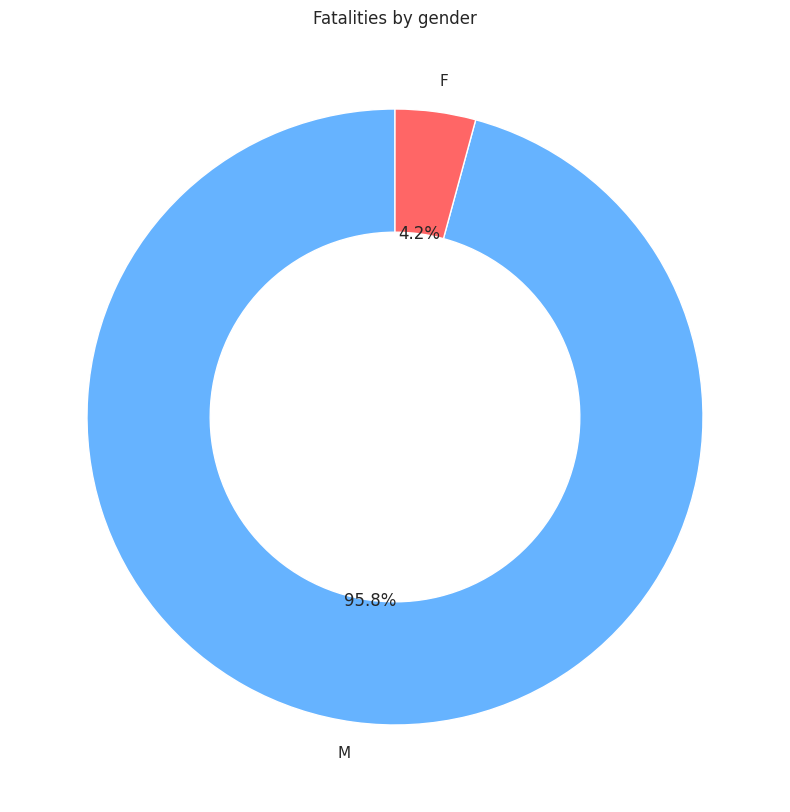

In [28]:
plt.figure(figsize=(10,10))
plt.pie(killed_by_gender, labels=killed_by_gender.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#ff6666'], wedgeprops=dict(width=0.4))
plt.title('Fatalities by gender')
plt.show()

# Create a Box Plot Showing the Age and Manner of Death

Break out the data by gender using `df_fatalities`. Is there a difference between men and women in the manner of death?

In [29]:
df_fatalities['age']=pd.to_numeric(df_fatalities['age'], errors='coerce')

In [30]:

manner_death_gender = df_fatalities.groupby(['gender', 'age', 'manner_of_death']).size().unstack(fill_value=0)
manner_death_gender

manner_of_death  shot  shot and Tasered
gender age                             
F      0.00         3                 0
       12.00        1                 0
       16.00        1                 0
       17.00        3                 1
       18.00        1                 0
...               ...               ...
M      80.00        1                 0
       82.00        2                 0
       83.00        2                 0
       86.00        2                 0
       91.00        1                 0

[119 rows x 2 columns]

In [31]:
manner_death = df_fatalities.groupby(['age', 'manner_of_death']).size().unstack(fill_value=0)
manner_death

manner_of_death,shot,shot and Tasered
age,,
0.00,73,4
6.00,1,0
12.00,1,0
13.00,1,0
14.00,1,0
...,...,...
80.00,1,0
82.00,2,0
83.00,2,0


In [32]:
print(manner_death.columns)


Index(['shot', 'shot and Tasered'], dtype='object', name='manner_of_death')


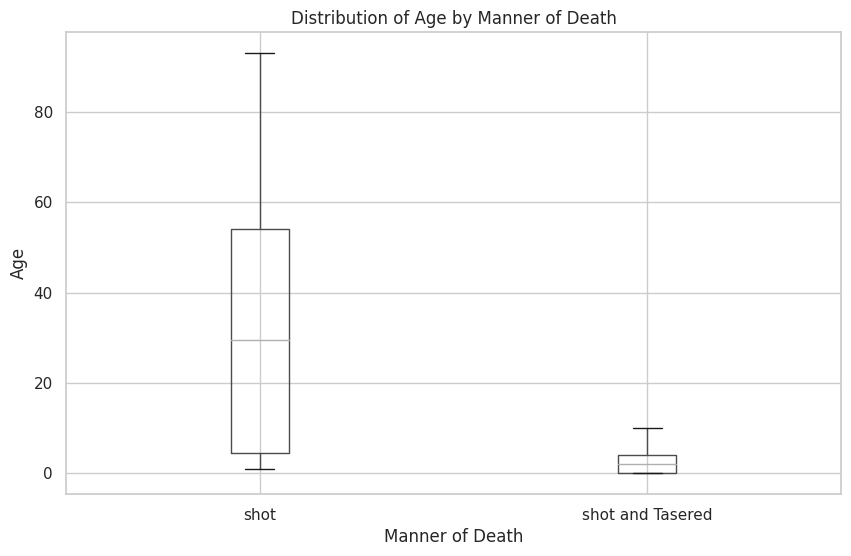

In [33]:
plt.figure(figsize=(10, 6))
manner_death.boxplot()
plt.title('Distribution of Age by Manner of Death')
plt.xlabel('Manner of Death')
plt.ylabel('Age')
plt.show()

In [34]:
df_fatalities.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.00,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.00,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.00,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.00,M,H,Evans,CO,False,attack,Not fleeing,False


# Were People Armed?

In what percentage of police killings were people armed? Create chart that show what kind of weapon (if any) the deceased was carrying. How many of the people killed by police were armed with guns versus unarmed?

In [35]:
were_they_armed=df_fatalities['armed'].value_counts(ascending=False)
were_they_armed

gun                                 1398
knife                                373
vehicle                              177
unarmed                              171
undetermined                         117
                                    ... 
straight edge razor                    1
baseball bat and fireplace poker       1
bean-bag gun                           1
chain                                  1
pen                                    1
Name: armed, Length: 69, dtype: int64

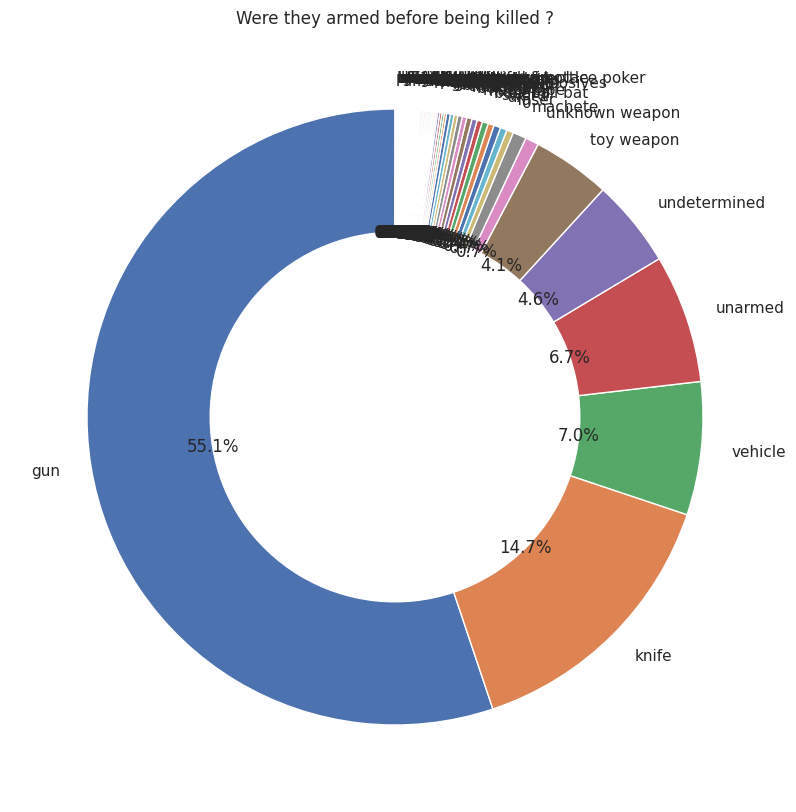

In [36]:
plt.figure(figsize=(10,10))
plt.pie(were_they_armed, labels=were_they_armed.index, autopct='%1.1f%%', startangle=90,  wedgeprops=dict(width=0.4))
plt.title('Were they armed before being killed ?')
plt.show()

# How Old Were the People Killed?

Work out what percentage of people killed were under 25 years old.  

In [37]:

total_fatalities = df_fatalities['age'].count()
fatalities_under_25 = df_fatalities[df_fatalities['age'] <= 25]['age'].count()

percentage_under_25 = (fatalities_under_25 / total_fatalities) * 100

print("Percentage of people killed who were under 25: {:.2f}%".format(percentage_under_25))


Percentage of people killed who were under 25: 24.85%


Create a histogram and KDE plot that shows the distribution of ages of the people killed by police.

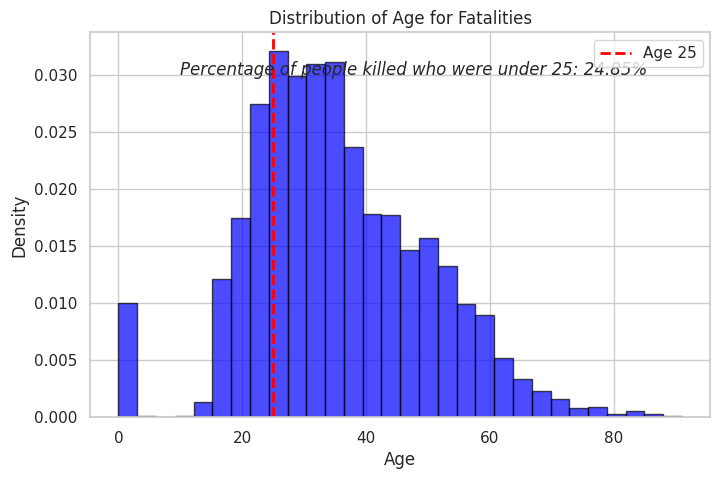

In [38]:

plt.figure(figsize=(8, 5))
plt.hist(df_fatalities['age'], bins=30, alpha=0.7, color='blue', edgecolor='black', density=True)
plt.axvline(x=25, color='red', linestyle='--', linewidth=2, label='Age 25')  # Adding a vertical line at age 25
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Distribution of Age for Fatalities')
plt.text(10, 0.03, 'Percentage of people killed who were under 25: {:.2f}%'.format(percentage_under_25), style='italic')
plt.legend()
plt.show()


<ipython-input-39-ce9a3bd12287>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_fatalities['age'], shade=True, color="b")


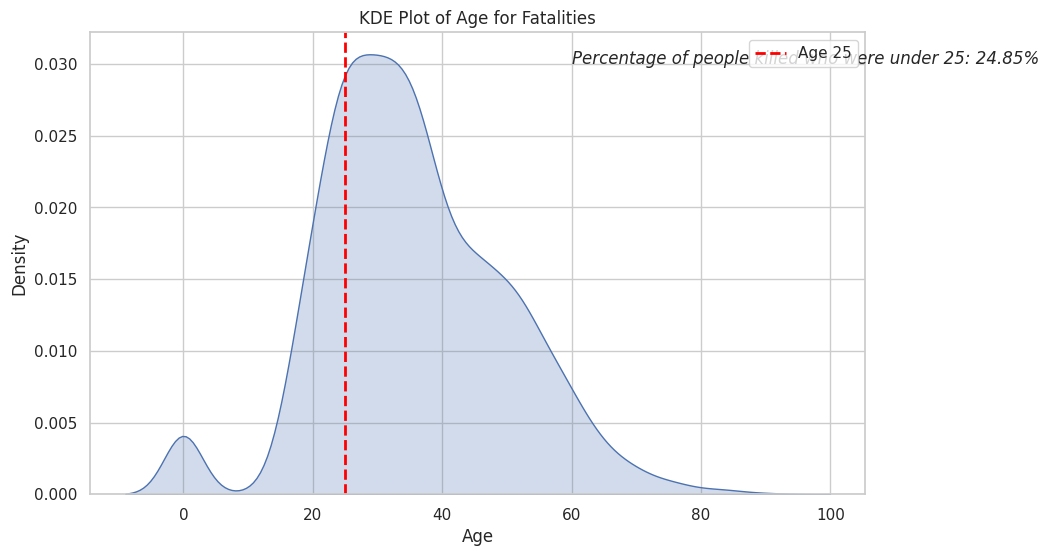

In [39]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.kdeplot(df_fatalities['age'], shade=True, color="b")
plt.axvline(x=25, color='red', linestyle='--', linewidth=2, label='Age 25')
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('KDE Plot of Age for Fatalities')
plt.text(60, 0.03, 'Percentage of people killed who were under 25: {:.2f}%'.format(percentage_under_25), style='italic')  # Adding text annotation for the percentage
plt.legend()
plt.show()

Create a seperate KDE plot for each race. Is there a difference between the distributions?

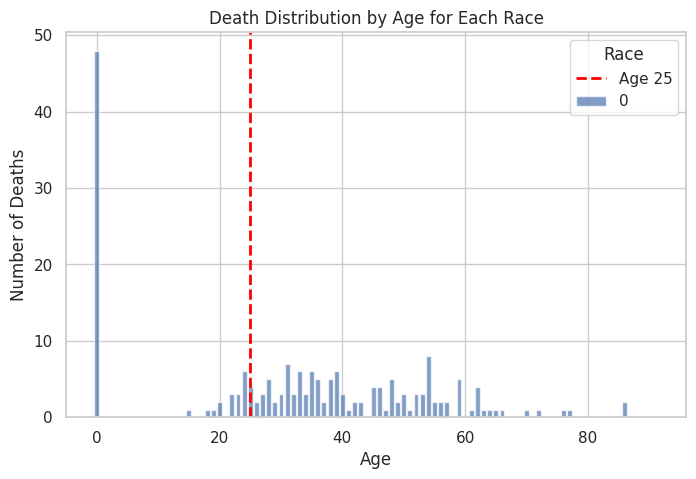

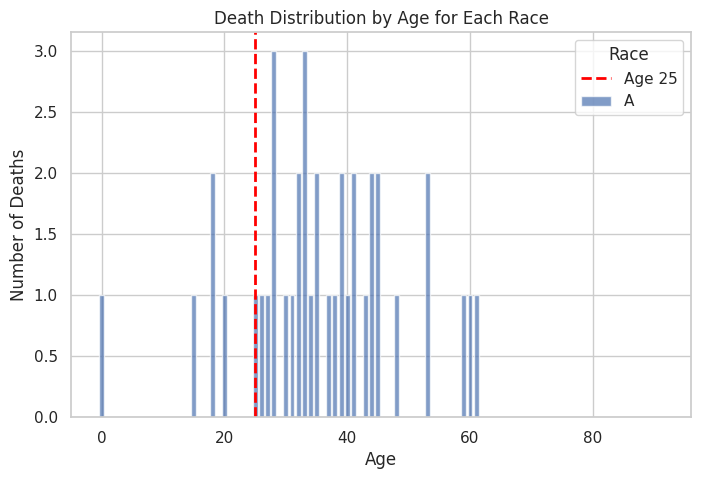

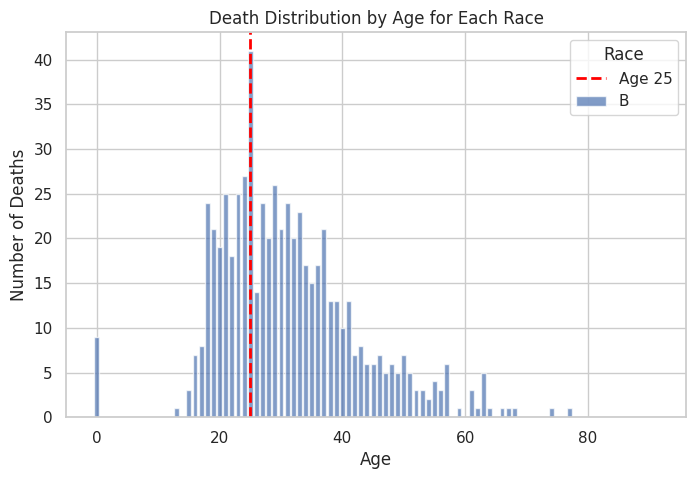

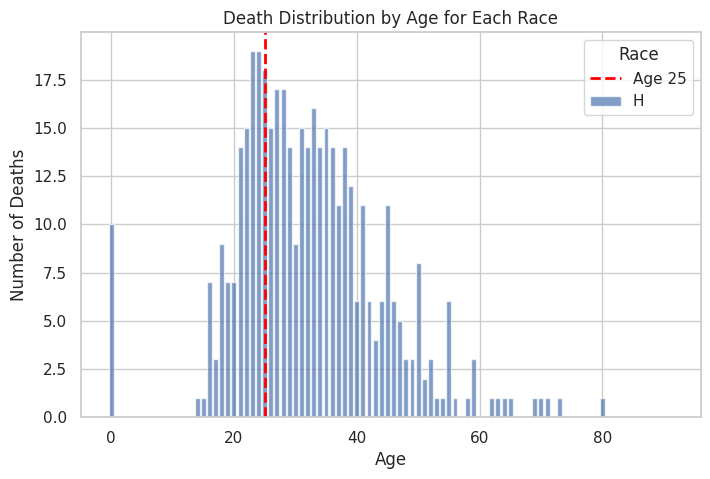

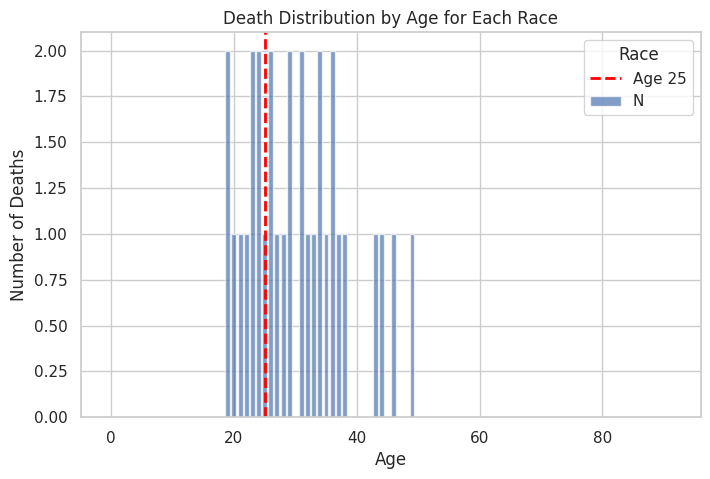

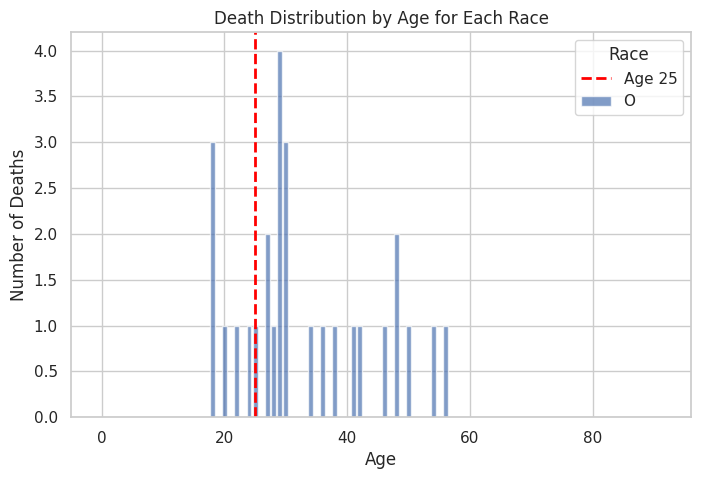

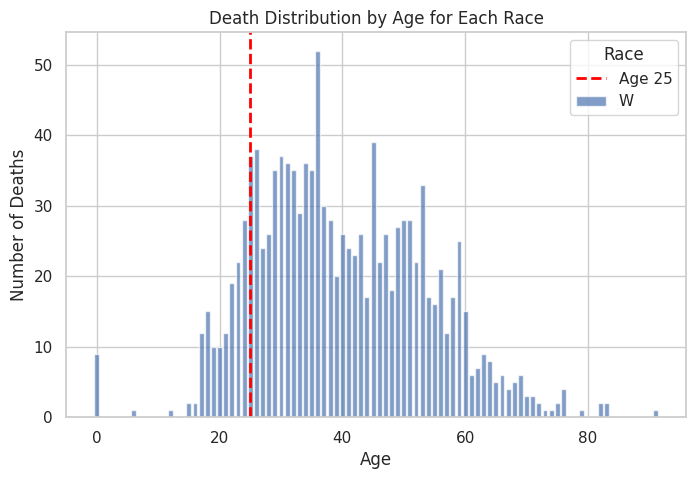

In [40]:

deaths_by_race_age = df_fatalities.groupby(['race', 'age']).size().unstack(fill_value=0)

for race in deaths_by_race_age.index:
    plt.figure(figsize=(8, 5))
    plt.bar(deaths_by_race_age.columns, deaths_by_race_age.loc[race], alpha=0.7, label=race)
    plt.axvline(x=25, color='red', linestyle='--', linewidth=2, label='Age 25')

    plt.xlabel('Age')
    plt.ylabel('Number of Deaths')
    plt.title('Death Distribution by Age for Each Race')
    plt.legend(title='Race')
    plt.show()


# Race of People Killed

Create a chart that shows the total number of people killed by race.

In [41]:
total_killed_by_race=df_fatalities['race'].value_counts(ascending=False)
total_killed_by_race

W    1201
B     618
H     423
0     195
A      39
N      31
O      28
Name: race, dtype: int64

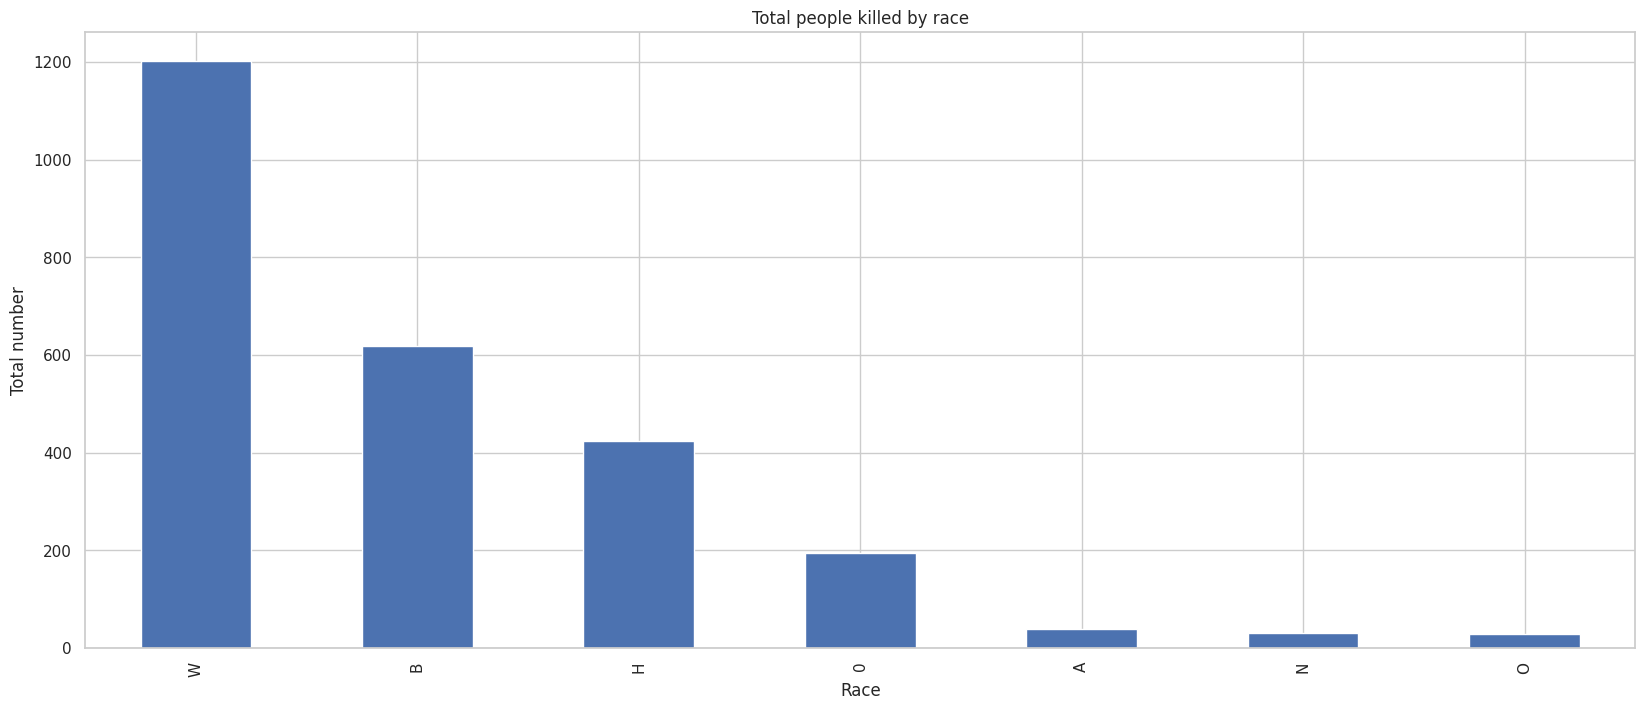

In [42]:
plt.figure(figsize=(20,8))
total_killed_by_race.plot(kind='bar', title='Total people killed by race')
plt.xlabel('Race')
plt.ylabel('Total number')
plt.show()

# Mental Illness and Police Killings

What percentage of people killed by police have been diagnosed with a mental illness?

In [43]:
total_killed=df_fatalities['signs_of_mental_illness'].count()
mental_illness=df_fatalities[df_fatalities['signs_of_mental_illness']== True].count()
print(total_killed)
print(mental_illness)

2535
id                         633
name                       633
date                       633
manner_of_death            633
armed                      633
age                        633
gender                     633
race                       633
city                       633
state                      633
signs_of_mental_illness    633
threat_level               633
flee                       633
body_camera                633
dtype: int64


In [44]:
percentage_mental_illness_killed=(mental_illness/total_killed)*100
percentage_mental_illness_killed

id                        24.97
name                      24.97
date                      24.97
manner_of_death           24.97
armed                     24.97
age                       24.97
gender                    24.97
race                      24.97
city                      24.97
state                     24.97
signs_of_mental_illness   24.97
threat_level              24.97
flee                      24.97
body_camera               24.97
dtype: float64

# In Which Cities Do the Most Police Killings Take Place?

Create a chart ranking the top 10 cities with the most police killings. Which cities are the most dangerous?  

In [48]:
df_fatalities.head()
city_killing = df_fatalities['city'].value_counts(ascending=False).head(10)
city_killing

Los Angeles    39
Phoenix        31
Houston        27
Chicago        25
Las Vegas      21
San Antonio    20
Columbus       19
Austin         18
Miami          18
St. Louis      15
Name: city, dtype: int64

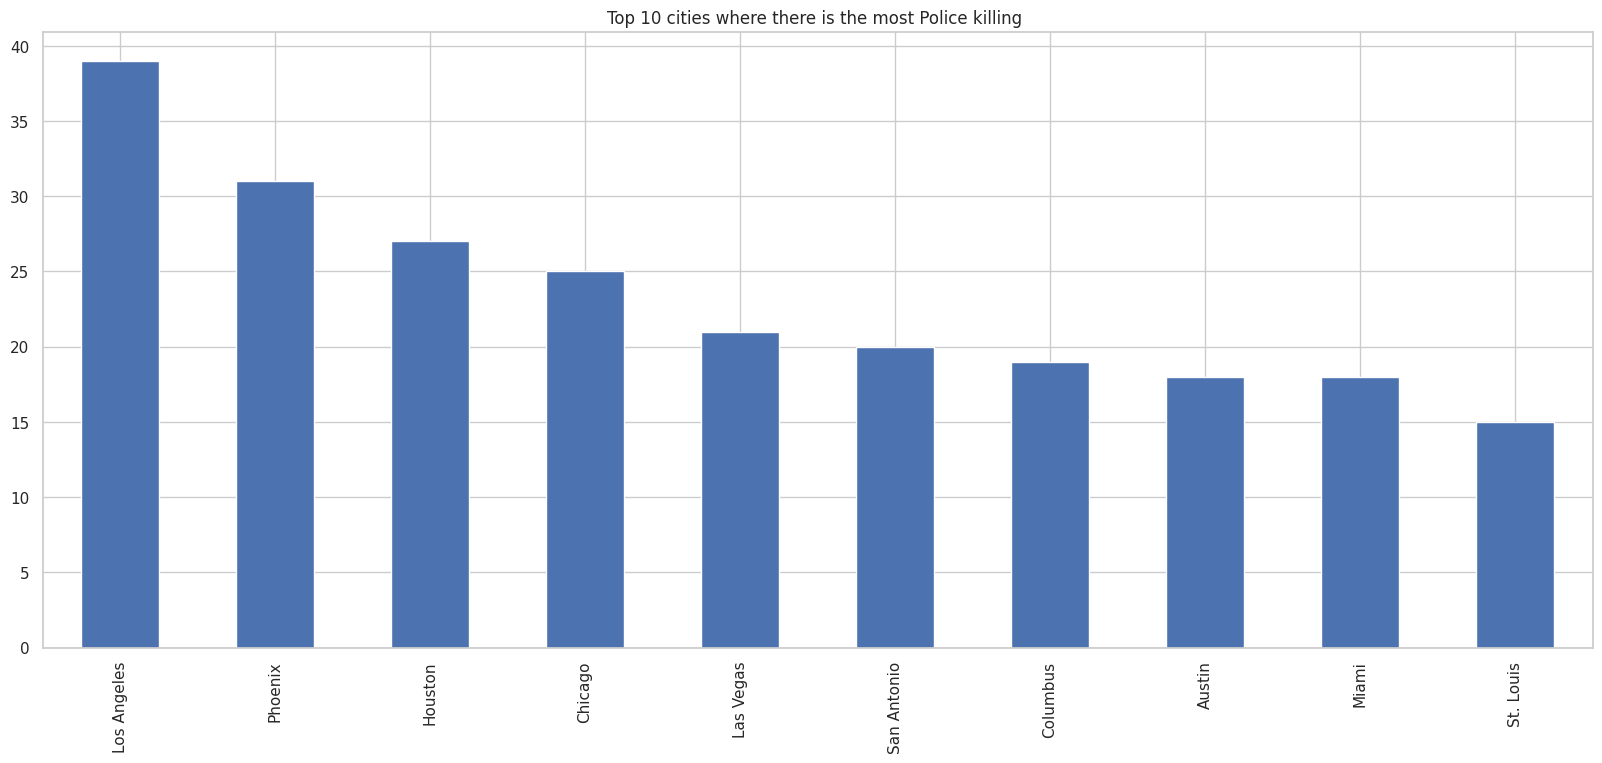

In [50]:
plt.figure(figsize=(20,8))
city_killing.plot(kind='bar', title='Top 10 cities where there is the most Police killing ')
plt.xlabel=('Cities')
plt.ylabel=('Number of poeple killed by the Police')
plt.show()

# Rate of Death by Race

Find the share of each race in the top 10 cities. Contrast this with the top 10 cities of police killings to work out the rate at which people are killed by race for each city.

TypeError: ignored

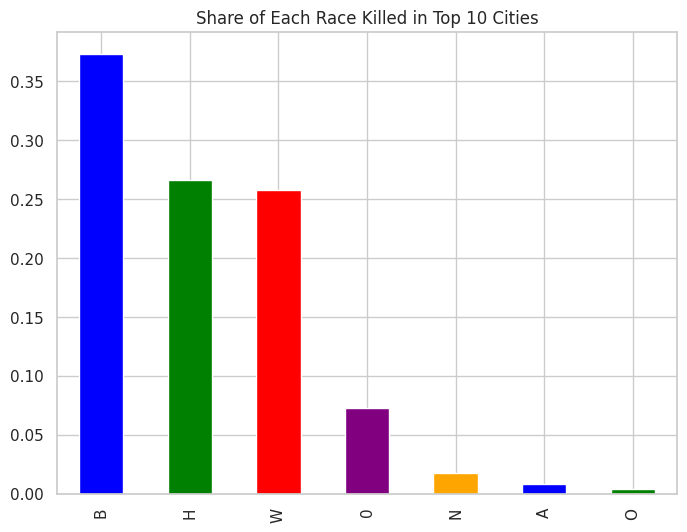

In [54]:
top_10cities= df_fatalities['city'].value_counts(ascending=False).head(10).index.tolist()
top_cities_race_share=df_fatalities[df_fatalities['city'].isin(top_10cities)]['race'].value_counts(normalize=True)
plt.figure(figsize=(8, 6))
top_cities_race_share.plot(kind='bar', color=['blue', 'green', 'red', 'purple', 'orange'])
plt.title('Share of Each Race Killed in Top 10 Cities')
plt.xlabel('Race')
plt.ylabel('Share')
plt.show()

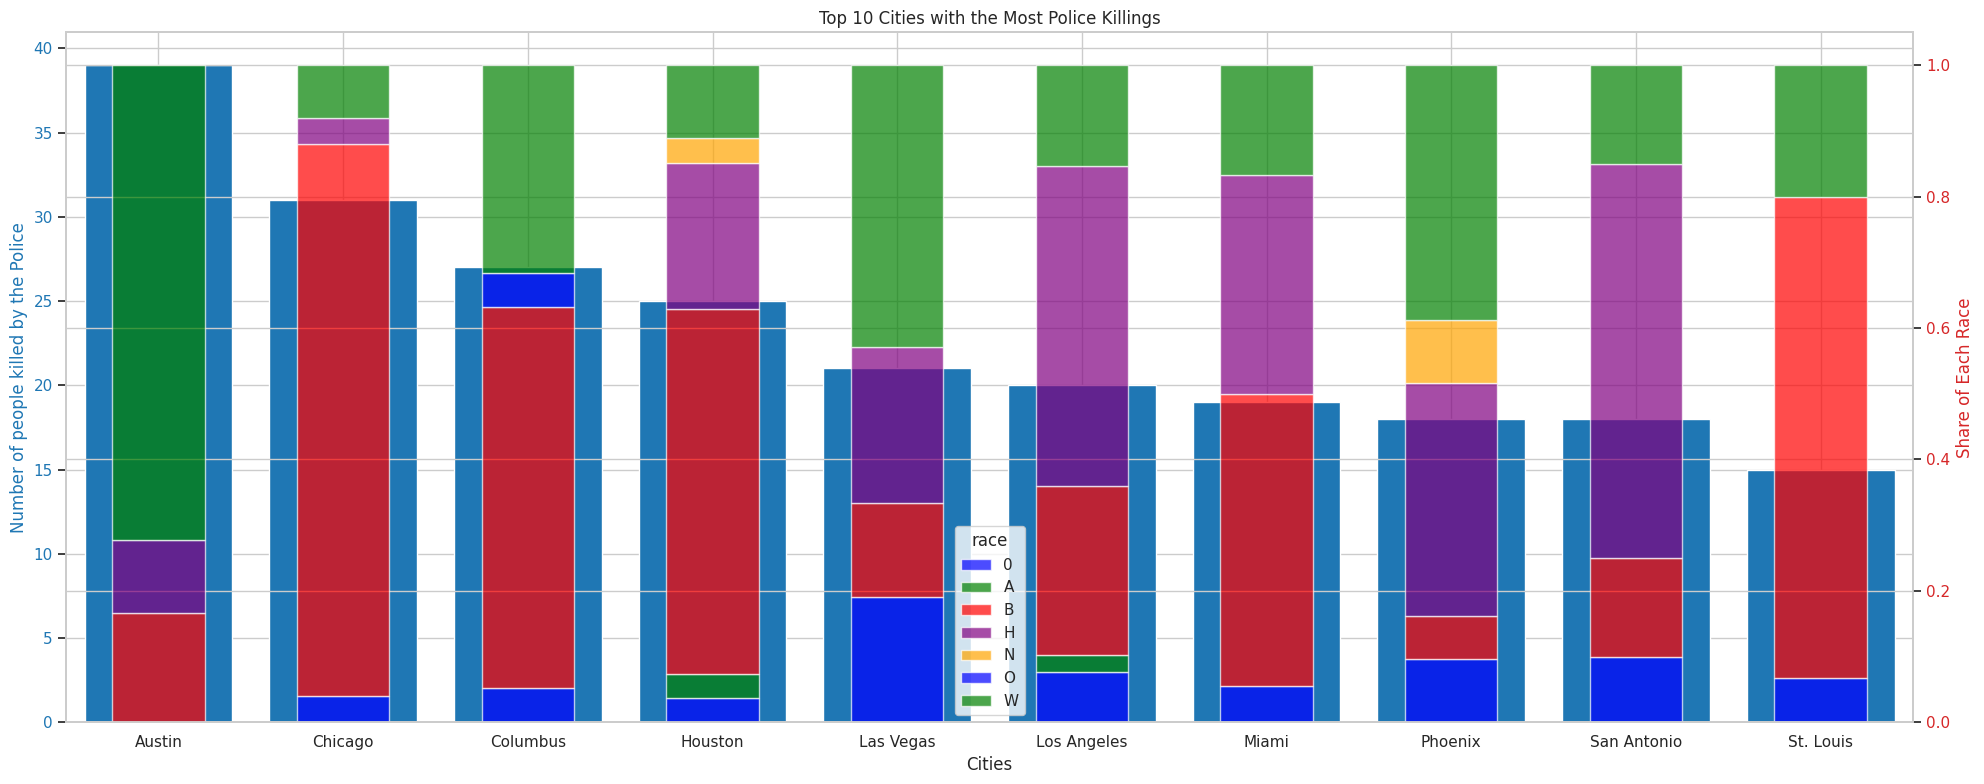

In [56]:

top_cities = df_fatalities['city'].value_counts(ascending=False).head(10)

top_cities_data = df_fatalities[df_fatalities['city'].isin(top_cities.index)]

city_race_share = top_cities_data.groupby('city')['race'].value_counts(normalize=True).unstack().fillna(0)

fig, ax1 = plt.subplots(figsize=(20, 8))

color = 'tab:blue'
ax1.bar(top_cities.index, top_cities.values, color=color)
ax1.set_title('Top 10 Cities with the Most Police Killings')
ax1.set_xlabel('Cities')
ax1.set_ylabel('Number of people killed by the Police', color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:red'
city_race_share.plot(kind='bar', stacked=True, ax=ax2, color=['blue', 'green', 'red', 'purple', 'orange'], alpha=0.7)
ax2.set_ylabel('Share of Each Race', color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()


# Create a Choropleth Map of Police Killings by US State

Which states are the most dangerous? Compare your map with your previous chart. Are these the same states with high degrees of poverty?

In [57]:
df_fatalities.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.00,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.00,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.00,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.00,M,H,Evans,CO,False,attack,Not fleeing,False


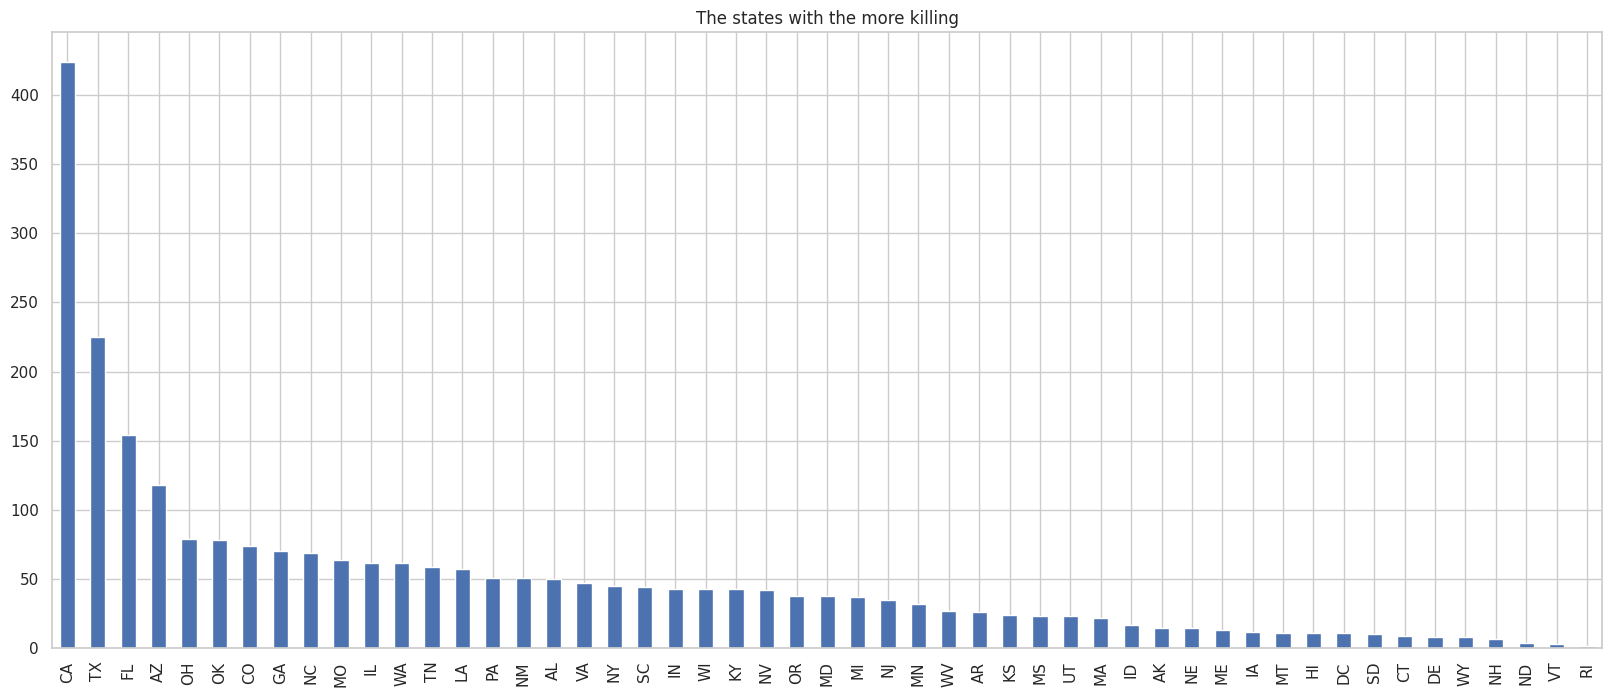

In [62]:
states_more_killing=df_fatalities['state'].value_counts(ascending=False)
plt.figure(figsize=(20,8))
states_more_killing.plot(kind='bar', title='The states with the more killing')
plt.xlabel=('States')
plt.ylable=('Killing')
plt.show()

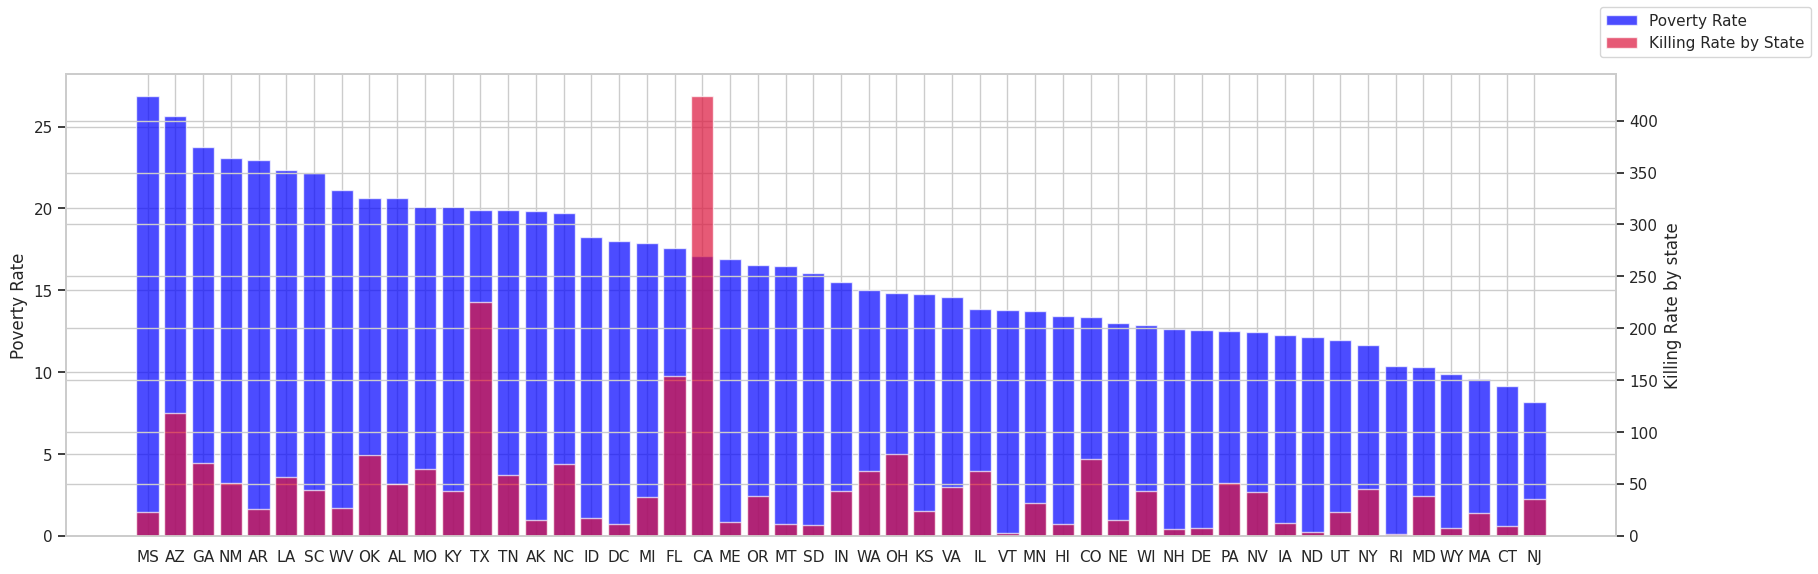

In [63]:
fig, ax1 = plt.subplots(figsize=(20, 6))
ax2 = ax1.twinx()

ax1.bar(states_poverty_rates.index, states_poverty_rates, color='blue', alpha=0.7, label='Poverty Rate')
ax2.bar(states_more_killing.index, states_more_killing, color='crimson', alpha=0.7, label='Killing Rate by State')

ax1.set_ylabel('Poverty Rate')
ax2.set_ylabel('Killing Rate by state')

fig.legend(loc="upper right")

plt.show()

# Number of Police Killings Over Time

Analyse the Number of Police Killings over Time. Is there a trend in the data?

In [64]:
df_fatalities['date']=pd.to_datetime(df_fatalities['date'])

In [69]:
killing_over_time=df_fatalities['date'].value_counts().sort_index()
killing_over_time

2015-01-03    3
2015-01-04    2
2015-01-06    1
2015-01-07    2
2015-01-08    2
             ..
2017-12-03    2
2017-12-04    1
2017-12-05    4
2017-12-06    4
2017-12-07    3
Name: date, Length: 879, dtype: int64

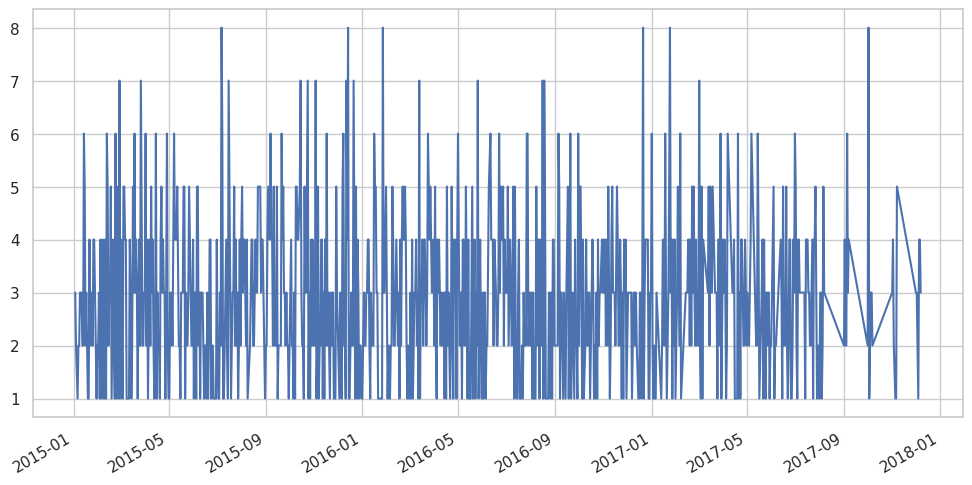

In [71]:

plt.figure(figsize=(12, 6))
killing_over_time.plot()
plt.title=('Number of Police Killings Over Time')
plt.xlabel=('Date')
plt.ylabel=('Number of Killings')
plt.show()

In [72]:
df_fatalities['year'] = df_fatalities['date'].dt.year

killings_by_year = df_fatalities['year'].value_counts().sort_index()

print(killings_by_year)

2015    991
2016    963
2017    581
Name: year, dtype: int64


# Epilogue

Now that you have analysed the data yourself, read [The Washington Post's analysis here](https://www.washingtonpost.com/graphics/investigations/police-shootings-database/).